<a href="https://colab.research.google.com/github/SandeepReddy55762/hand-written-character-recognization/blob/main/minor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

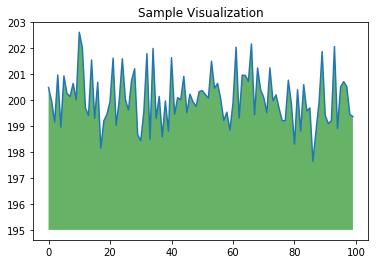

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.utils import shuffle
from tqdm import tqdm_notebook
from keras.datasets import mnist
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/A_Z Handwritten Data'
data = pd.read_csv(data_path +'/A_Z Handwritten Data.csv',header = None).astype('float32')
print(data.head(10))

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0 

In [ ]:
X = data.drop([0],axis = 1)
y = data[0]

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74491, 28, 28)


In [ ]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [ ]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74491, 28, 28, 1)


In [ ]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74491, 26)


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau ( monitor = 'val_loss' , factor = 0.2 , patience=1 , min_lr=0.0001)
early_stop = EarlyStopping(monitor = 'val_loss',min_delta = 0, patience = 2, verbose=0, mode='auto')
history = model.fit(train_X, train_yOHE, epochs=5, validation_data = (test_X,test_yOHE))

Epoch 1/5
9312/9312 [==============================] - 417s 45ms/step - loss: 0.1632 - accuracy: 0.9553 - val_loss: 0.0824 - val_accuracy: 0.9781
Epoch 2/5
9312/9312 [==============================] - 408s 44ms/step - loss: 0.0736 - accuracy: 0.9796 - val_loss: 0.0743 - val_accuracy: 0.9791
Epoch 3/5
9312/9312 [==============================] - 410s 44ms/step - loss: 0.0621 - accuracy: 0.9831 - val_loss: 0.0615 - val_accuracy: 0.9843
Epoch 4/5
9312/9312 [==============================] - 406s 44ms/step - loss: 0.0551 - accuracy: 0.9851 - val_loss: 0.0578 - val_accuracy: 0.9857
Epoch 5/5
9312/9312 [==============================] - 405s 44ms/step - loss: 0.0515 - accuracy: 0.9861 - val_loss: 0.0679 - val_accuracy: 0.9839


In [ ]:
model.save(r'/content/drive/MyDrive/A_Z Handwritten Data/model_v5')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/A_Z Handwritten Data/model_v5/assets


In [ ]:
scores=model.evaluate(test_X,test_yOHE,verbose=0)
print("Accuracy:%.2f%%" % (scores[1]*100))

Accuracy:98.39%


In [ ]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/A_Z Handwritten Data/model_v5')
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.978091299533844, 0.9791115522384644, 0.984279990196228, 0.9857029914855957, 0.9838504195213318]
The training accuracy is : [0.9553094506263733, 0.9796248078346252, 0.9830950498580933, 0.9850584268569946, 0.9861390590667725]
The validation loss is : [0.08243484050035477, 0.07431917637586594, 0.06150136888027191, 0.05781364440917969, 0.06794892996549606]
The training loss is : [0.1631799042224884, 0.07360181212425232, 0.062125466763973236, 0.05505172163248062, 0.05148572847247124]


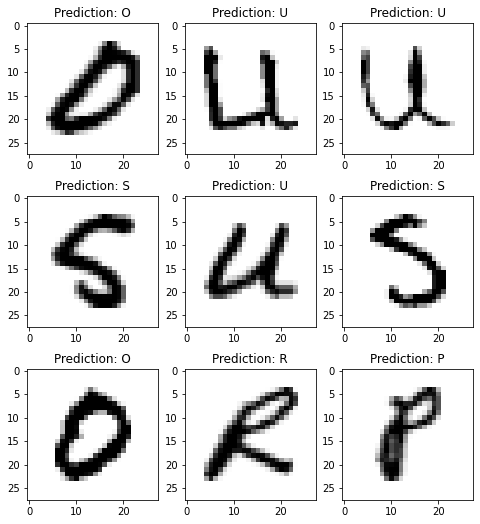

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
 img = np.reshape(test_X[i], (28,28))
 ax.imshow(img, cmap="Greys")
 pred = word_dict[np.argmax(test_yOHE[i])]
 ax.set_title("Prediction: "+pred)

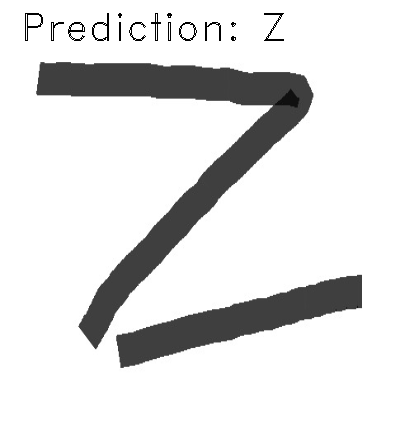

In [ ]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/A_Z Handwritten Data/model_v5')
words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}
from google.colab.patches import cv2_imshow
#for i in range(1,11):
img = cv2.imread(r'/content/drive/MyDrive/A_Z Handwritten Data/z.jpeg')
img_copy = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))
img_pred = word_dict[np.argmax(model.predict(img_final))]
window_name='image'
cv2.putText(img, "Prediction: " + img_pred, (20,40), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (0,0,0))
cv2_imshow(img)

cv2.waitKey(0)

cv2.destroyAllWindows()